Importing the libraries and dependencies required:

In [1]:
!pip install category_encoders

In [2]:
!pip install pingouin

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from io import StringIO
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
from category_encoders import BinaryEncoder
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer
)
from sklearn.pipeline import Pipeline, make_pipeline
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
seed = 42

In [4]:
data=pd.read_csv('Data_Train.csv')
data.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [5]:
test=pd.read_csv('Data_Test.csv')
test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,...,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,...,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,...,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,...,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,...,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [6]:
data['Home Status'].replace(['MOR??AGE','REN?'], ['Mortgage','Rent'], inplace = True)

In [7]:
test['Home Status'].replace(['MOR??AGE','REN?'], ['Mortgage','Rent'], inplace = True)

## **EDA: Explaratory Data Analysis**

### Main stats of numeric attributes:

In [8]:
data.describe().round(3)

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
count,87500.000,87500.000,81925.000,87500.000,87500.000,84011.000,86111.000,87500.000,87500.000,87500.000,87500.000,87500.000,87500.000,87500.000,87500.000,87500.000,83314.000,82648.000,87500.000,87500.000
mean,83946.254,3798914.124,134859.630,0.333,0.006,30.943,51155.385,25920.536,0.202,16.518,95.517,0.671,236389.465,39.462,22.025,12.779,53268.640,29556.495,0.316,0.189
std,36100.103,2289038.083,98824.726,0.876,0.084,14.080,31211.230,14433.837,0.646,4.902,40.554,0.960,255056.782,391.920,6.453,5.371,53255.514,37456.245,3.546,0.391
min,21560.000,24847.000,8800.000,0.000,0.000,0.000,1000.000,1710.000,0.000,8.000,0.000,0.000,0.000,0.000,11.000,2.000,332.000,0.000,0.000,0.000
25%,52616.750,1483874.250,83246.592,0.000,0.000,20.429,22900.000,15048.000,0.000,12.310,66.048,0.000,51734.930,0.000,17.000,9.000,23240.000,11446.740,0.000,0.000
50%,83900.000,4132010.500,114400.000,0.000,0.000,30.139,47700.000,23940.000,0.000,16.490,97.008,0.000,138806.225,0.000,21.000,12.000,39674.000,20892.780,0.000,0.000
75%,115261.250,5952908.750,160160.000,0.000,0.000,40.908,80200.000,34200.000,0.000,20.770,126.592,1.000,353475.540,0.000,26.000,16.000,66400.000,36449.078,0.000,0.000
max,146559.000,7351847.000,8264030.720,18.000,6.000,639.290,99900.000,59850.000,86.000,25.000,1534.756,8.000,5629234.330,26308.470,45.000,83.000,1710630.000,1338777.810,169.050,1.000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [10]:
data.describe(include=[np.object])

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type
count,87500,87500,87500,87500,86086,87500,87500,87500,87500,87500
unique,7,11,3,5,40354,2,49,2,13,2
top,II,>10yrs,Source Verified,Mortgage,School Teacher,whole,California,3 years,debt consolidation,I
freq,24966,30849,34504,44160,1585,46300,12625,60061,52559,87454


In [11]:
# Checking data balance/proportion
loan = data['Loan/No Loan'].value_counts().to_frame().rename(columns={"Loan/No Loan":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

,absolute,percent
0,70988,81.13
1,16512,18.87


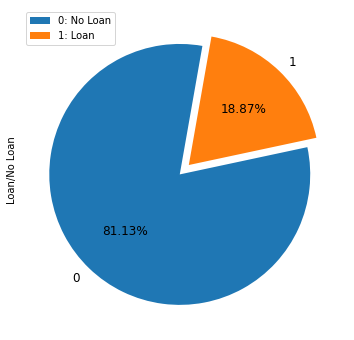

In [12]:
# pie chart
data['Loan/No Loan'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: No Loan","1: Loan"]);

Unbalanced data: target has 81% of "NO LOAN" (value 0) against 19% of "LOAN" (value 1).

### Type of variables:

In [13]:
data.dtypes.sort_values(ascending=True)

ID                       int64
Account Open             int64
Sub GGGrade              int64
Inquiries                int64
Deprecatory Records      int64
Already Defaulted        int64
Unpaid 2 years           int64
Loan/No Loan             int64
Asst_Reg                 int64
Yearly Income          float64
Unpaid Amount          float64
Total Unpaid CL        float64
Present Balance        float64
Usage Rate             float64
Gross Collection       float64
Lend Amount            float64
Postal Code            float64
Debt to Income         float64
Due Fee                float64
Interest Charged       float64
Validation              object
Experience              object
Home Status             object
GGGrade                 object
File Status             object
State                   object
Duration                object
Designation             object
Reason                  object
Claim Type              object
dtype: object

### Couting variables by type:

In [14]:
data.dtypes.value_counts()

float64    11
object     10
int64       9
dtype: int64

### Checking for missing values:

In [15]:
nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
ID,0,0.00
Asst_Reg,0,0.00
GGGrade,0,0.00
Experience,0,0.00
Validation,0,0.00
Yearly Income,5575,26.67
Home Status,0,0.00
Unpaid 2 years,0,0.00
Already Defaulted,0,0.00
Designation,1414,6.76


## EDA functions
Describing all the features in the dataset using and abusing graphics. Start by defining a few functions for every chart: boxplot, histograms, bar and pie charts, scatterplots, pivot charts, as well as a statistic descriptions.

In [16]:
# General statistics
def stats(x):
    print(f"Variable: {x}")
    print(f"Type of variable: {data[x].dtype}")
    print(f"Total observations: {data[x].shape[0]}")
    detect_null_val = data[x].isnull().values.any()
    if detect_null_val:
        print(f"Missing values: {data[x].isnull().sum()} ({(data[x].isnull().sum() / data[x].isnull().shape[0] *100).round(2)}%)")
    else:
        print(f"Missing values? {data[x].isnull().values.any()}")
    print(f"Unique values: {data[x].nunique()}")
    if data[x].dtype != "O":
        print(f"Min: {int(data[x].min())}")
        print(f"25%: {int(data[x].quantile(q=[.25]).iloc[-1])}")
        print(f"Median: {int(data[x].median())}")
        print(f"75%: {int(data[x].quantile(q=[.75]).iloc[-1])}")
        print(f"Max: {int(data[x].max())}")
        print(f"Mean: {data[x].mean()}")
        print(f"Std dev: {data[x].std()}")
        print(f"Variance: {data[x].var()}")
        print(f"Skewness: {scipy.stats.skew(data[x])}")
        print(f"Kurtosis: {scipy.stats.kurtosis(data[x])}")
        print("")
        
        # Percentiles 1%, 5%, 95% and 99%
        print("Percentiles 1%, 5%, 95%, 99%")
        display(data[x].quantile(q=[.01, .05, .95, .99]))
        print("")
    else:
        print(f"List of unique values: {data[x].unique()}")

In [17]:
# Variable vs. target chart
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='No Loan', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Loan', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [18]:
# Boxplot + Hist chart
def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    ax_box.set(xlabel='')
    plt.show()

In [19]:
# Histogram
def hist(x):
    plt.hist(data[x], bins=25)
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [20]:
# Pie chart
def pie(x):
    data[x].value_counts(dropna=False).plot(kind='pie', figsize=(6,5), fontsize=10, autopct='%1.1f%%', startangle=0, legend=True, textprops={'color':"white", 'weight':'bold'});

In [21]:
# Number of observations by class
def obs(x):
  obs = data[x].value_counts(dropna=False)
  o = pd.DataFrame(obs)
  o.rename(columns={x:"Freq abs"}, inplace=True)
  o_pc = (data[x].value_counts(normalize=True) * 100).round(2)
  obs_pc = pd.DataFrame(o_pc)
  obs_pc.rename(columns={x:"percent %"}, inplace=True)
  obs = pd.concat([o,obs_pc], axis=1)
  display(obs)

In [22]:
# Variable vs. target chart
def target(x):
    short_0 = data[data['Loan/No Loan'] == 0].loc[:,x]
    short_1 = data[data['Loan/No Loan'] == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='No Loan', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Loan', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [23]:
# Boxplot + Hist chart
def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

In [24]:
# Bar chart
def bar(x):
    ax = data[x].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        plt.xlabel(x, fontsize=10)
        plt.xticks(rotation=0, horizontalalignment="center")
        plt.ylabel("Absolute values", fontsize=10)
        plt.title(x, fontsize=10, loc="right")

In [25]:
# Barh chart
def barh(x):
    data[x].value_counts().plot(kind="barh", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    plt.xlabel("Absolute values", fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel(x, fontsize=10)
    plt.title(x, fontsize=10, loc="right")

In [26]:
# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);

### Visualization of the numeric distribution:

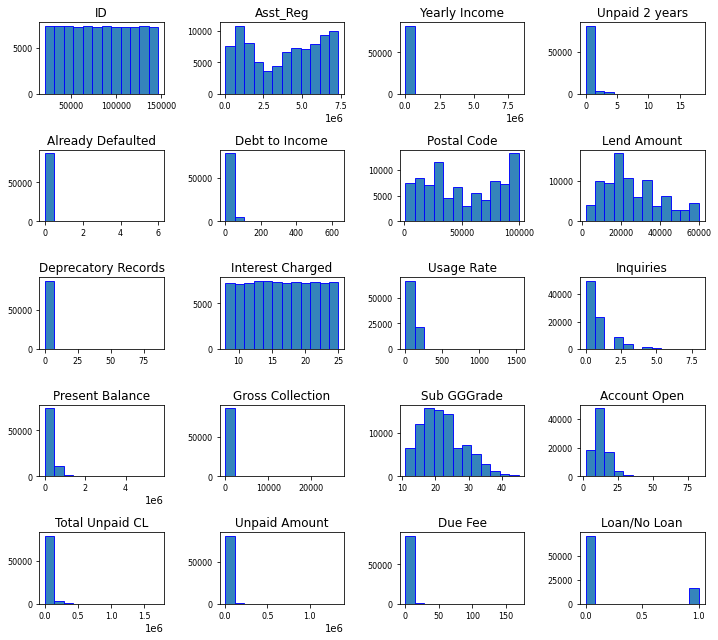

In [27]:
data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

### Visualization of the categoric distribution:

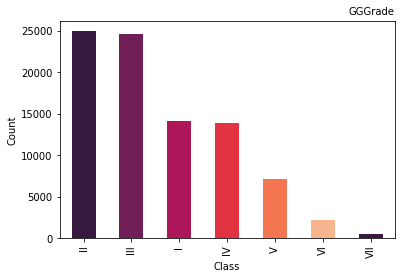

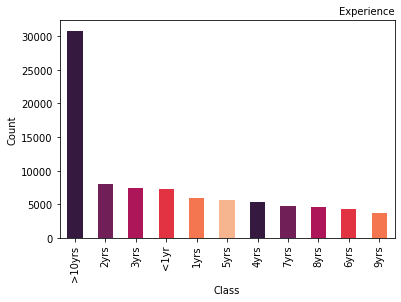

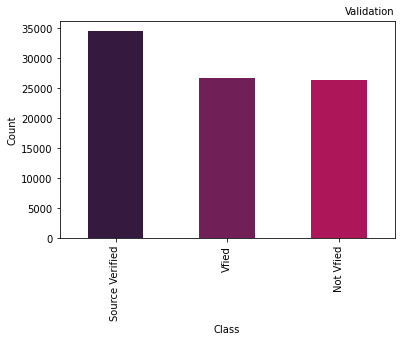

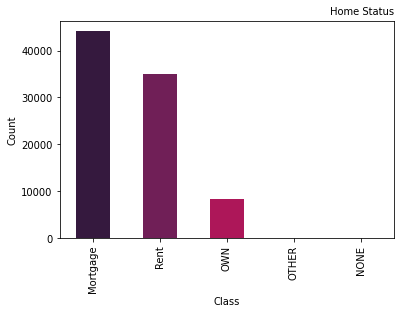

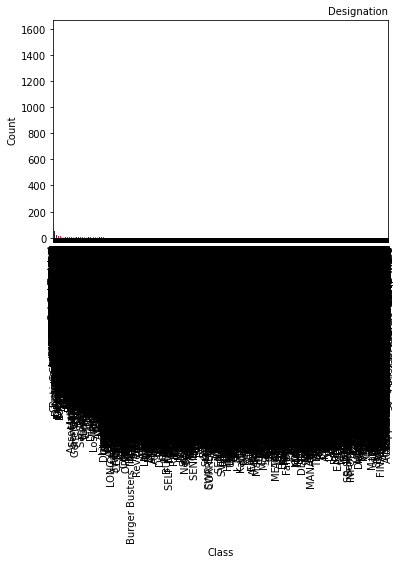

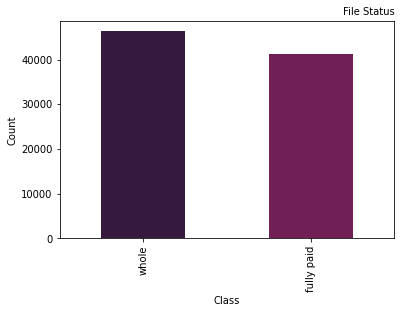

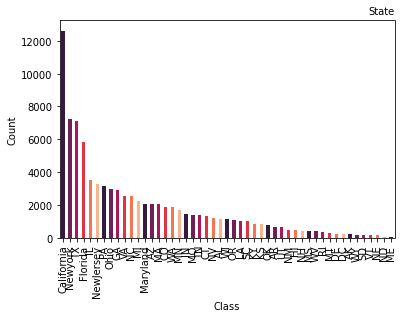

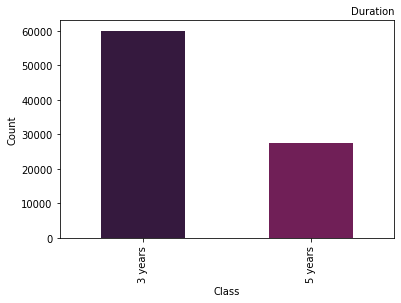

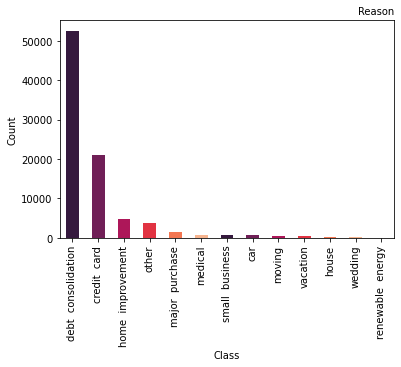

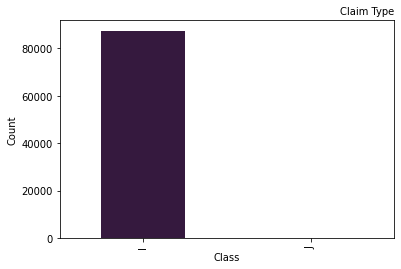

CPU times: user 9min 3s, sys: 1min 8s, total: 10min 11s
Wall time: 10min 3s


In [28]:
%%time
for col in data.select_dtypes(include=["object"]).columns:
    data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

### Feature: grade

In [28]:
stats("GGGrade")

Variable: GGGrade
Type of variable: object
Total observations: 87500
Missing values? False
Unique values: 7
List of unique values: ['II' 'IV' 'III' 'V' 'VII' 'VI' 'I']


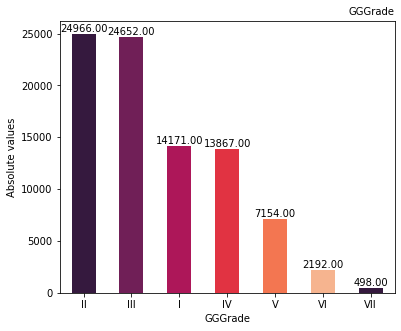

In [29]:
bar("GGGrade")

Home Status,Mortgage,NONE,OTHER,OWN,Rent
GGGrade,,,,,
I,6.927653e+08,NaN,NaN,111833893.0,388513828.0
II,1.087135e+09,173932.0,279626.0,194162115.0,823574049.0
III,1.002928e+09,29062.0,198937.0,199058241.0,859363853.0
IV,5.453941e+08,97250.0,NaN,115984236.0,496643337.0
V,2.816656e+08,NaN,NaN,62288887.0,257984672.0
VI,8.221514e+07,NaN,145865.0,20715038.0,80037282.0
VII,2.030427e+07,NaN,NaN,4873088.0,16932584.0


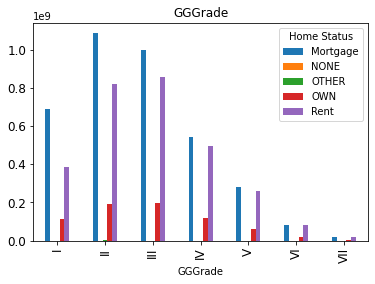

In [30]:
pivot_sum("Home Status","GGGrade","ID")

When the grade classes decrease, the type of homeownership tends to shift from mortgage to rent.

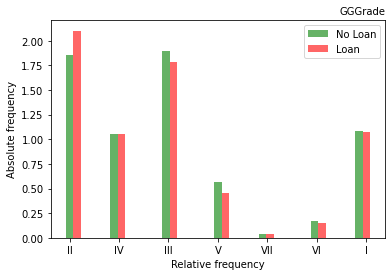

In [31]:
target("GGGrade")

### Feature: Yearly Income

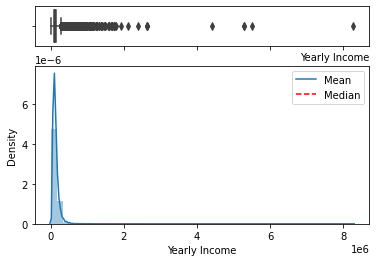

In [32]:
boxhist("Yearly Income")

In [33]:
stats("Yearly Income")

Variable: Yearly Income
Type of variable: float64
Total observations: 87500
Missing values: 5575 (6.37%)
Unique values: 6871
Min: 8800
25%: 83246
Median: 114400
75%: 160160
Max: 8264030
Mean: 134859.62977978378
Std dev: 98824.72556215935
Variance: 9766326382.436111
Skewness: nan
Kurtosis: nan

Percentiles 1%, 5%, 95%, 99%


0.01     36960.0
0.05     52800.0
0.95    272800.0
0.99    440000.0
Name: Yearly Income, dtype: float64

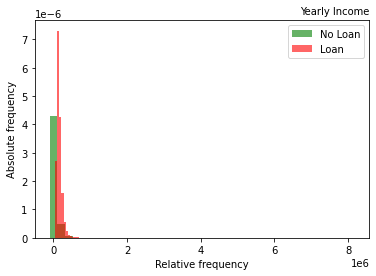

In [34]:
target("Yearly Income")

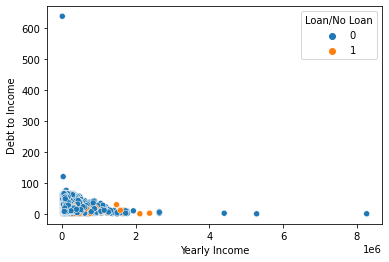

In [35]:
sns.scatterplot(data=data,x="Yearly Income",y="Debt to Income",hue="Loan/No Loan");

Feature: Experience

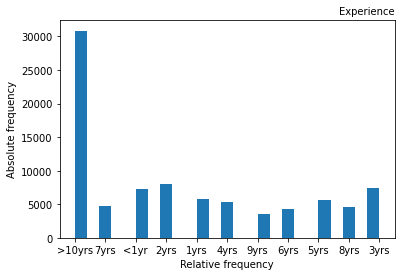

In [36]:
hist("Experience")

In [37]:
stats("Experience")

Variable: Experience
Type of variable: object
Total observations: 87500
Missing values? False
Unique values: 11
List of unique values: ['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs']


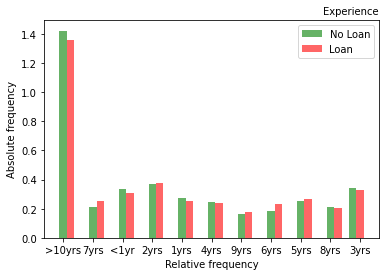

In [38]:
target("Experience")

Feature : Home Status

In [39]:
stats("Home Status")

Variable: Home Status
Type of variable: object
Total observations: 87500
Missing values? False
Unique values: 5
List of unique values: ['Mortgage' 'Rent' 'OWN' 'OTHER' 'NONE']


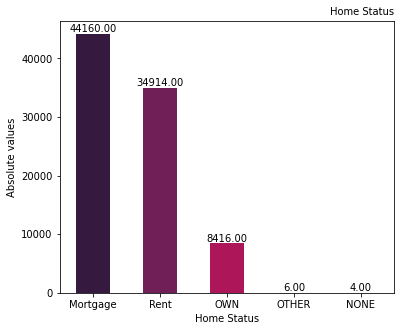

In [40]:
bar("Home Status")

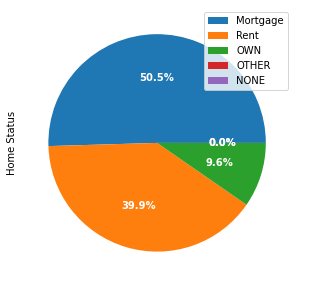

In [41]:
pie("Home Status")

Loan/No Loan,0,1
Home Status,,
Mortgage,2.980179e+09,732228387.0
NONE,NaN,300244.0
OTHER,2.058620e+05,418566.0
OWN,5.879245e+08,120991041.0
Rent,2.390038e+09,533011217.0


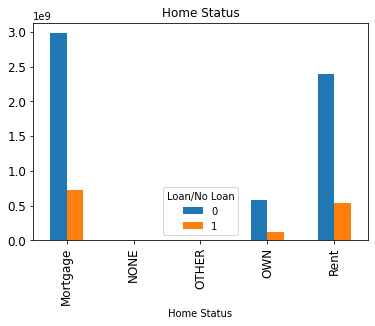

In [42]:
pivot_sum("Loan/No Loan","Home Status","ID")

Feature: Debt to Income

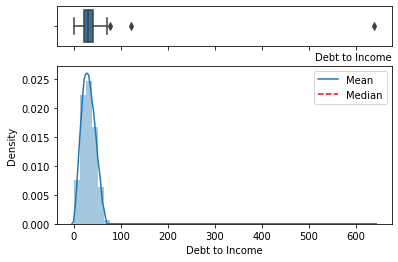

In [43]:
boxhist("Debt to Income")

In [44]:
stats("Debt to Income")

Variable: Debt to Income
Type of variable: float64
Total observations: 87500
Missing values: 3489 (3.99%)
Unique values: 3964
Min: 0
25%: 20
Median: 30
75%: 40
Max: 639
Mean: 30.94266038494914
Std dev: 14.079813220466304
Variance: 198.24114032321773
Skewness: nan
Kurtosis: nan

Percentiles 1%, 5%, 95%, 99%


0.01     3.9648
0.05     9.2736
0.95    55.1880
0.99    62.9832
Name: Debt to Income, dtype: float64

Home Status,Mortgage,NONE,OTHER,OWN,Rent
Reason,,,,,
car,6935.0400,NaN,NaN,2031.8088,8676.1752
credit card,309494.1024,105.0168,202.4232,66681.3840,252578.6592
debt consolidation,806541.1200,NaN,NaN,147807.7440,652110.4968
home improvement,96162.0072,53.3064,NaN,19409.6448,9766.9656
house,2004.1056,NaN,NaN,1261.0248,4143.8544
major purchase,15847.3392,NaN,NaN,4483.5504,16678.9056
medical,10760.5008,NaN,NaN,2612.3496,9850.6632
moving,2325.9600,NaN,NaN,513.7608,9989.1456
other,43538.0904,NaN,NaN,12565.7448,50679.3672


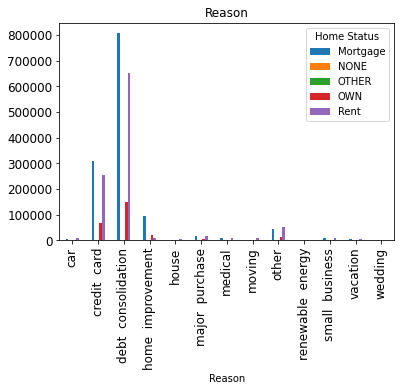

In [45]:
pivot_sum("Home Status", "Reason", "Debt to Income")

Loan/No Loan,0,1
GGGrade,,
I,299805.1056,64439.7264
II,567220.8864,137790.6264
III,629814.8640,122844.2040
IV,374883.4152,76802.8128
V,205211.2608,33647.5272
VI,60515.3472,10770.9504
VII,12824.8848,2952.2304


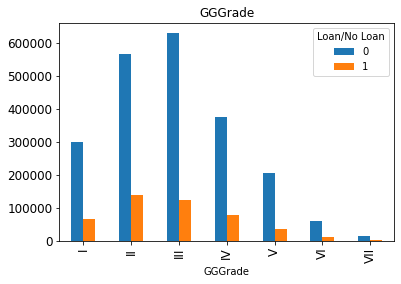

In [46]:
pivot_sum("Loan/No Loan", "GGGrade", "Debt to Income")

Feature: Reason

In [47]:
stats("Reason")

Variable: Reason
Type of variable: object
Total observations: 87500
Missing values? False
Unique values: 13
List of unique values: ['debt  consolidation' 'major  purchase' 'other' 'credit  card' 'car'
 'home  improvement' 'small  business' 'moving' 'vacation' 'medical'
 'wedding' 'house' 'renewable  energy']


Loan/No Loan,0,1
Reason,,
car,46126082,13030052
credit card,1473820828,303854626
debt consolidation,3552932342,854455563
home improvement,330346210,80045118
house,17906149,7812661
major purchase,102224423,23672413
medical,56134803,13811330
moving,33919448,8313756
other,259575413,57114577


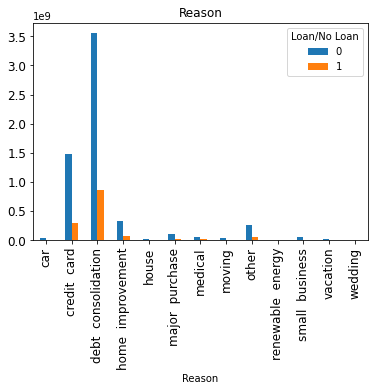

In [48]:
pivot_sum("Loan/No Loan", "Reason", "ID")

Feature: Duration

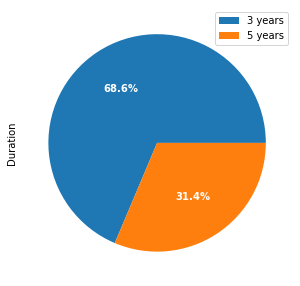

In [49]:
pie("Duration")

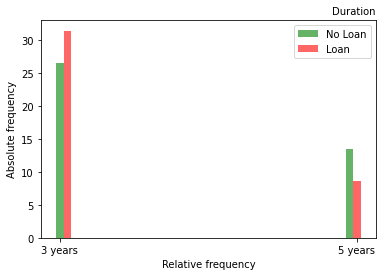

In [50]:
target("Duration")

Duration,3 years,5 years
GGGrade,,
I,156915.742618,177830.757511
II,131029.540354,164000.318341
III,118962.226552,143846.884408
IV,114612.894533,136101.617489
V,111682.103318,135289.568879
VI,99901.344905,135646.868511
VII,94821.931707,146398.367712


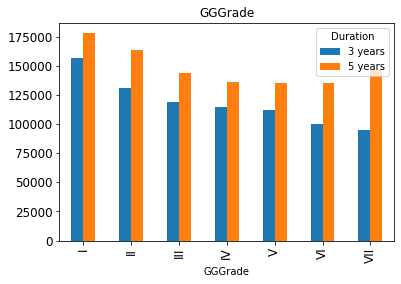

In [51]:
pivot_mean("Duration", "GGGrade", "Yearly Income")

Feature: Already Defaulted

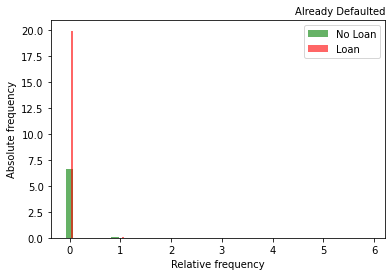

In [52]:
target("Already Defaulted")

In [53]:
stats("Already Defaulted")

Variable: Already Defaulted
Type of variable: int64
Total observations: 87500
Missing values? False
Unique values: 7
Min: 0
25%: 0
Median: 0
75%: 0
Max: 6
Mean: 0.005725714285714285
Std dev: 0.08350455181113921
Variance: 0.006973010173179231
Skewness: 20.34415315105525
Kurtosis: 708.0610643178103

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    0.0
0.99    0.0
Name: Already Defaulted, dtype: float64

Feature: Unpaid 2 Years

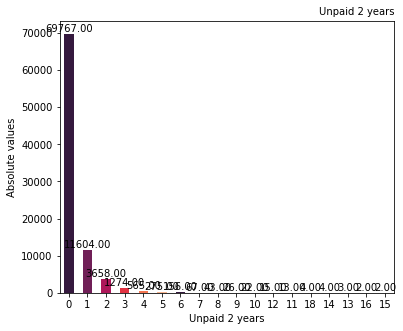

In [54]:
bar("Unpaid 2 years")

In [55]:
stats("Unpaid 2 years")

Variable: Unpaid 2 years
Type of variable: int64
Total observations: 87500
Missing values? False
Unique values: 18
Min: 0
25%: 0
Median: 0
75%: 0
Max: 18
Mean: 0.3329371428571429
Std dev: 0.8760798572221591
Variance: 0.7675159162303986
Skewness: 5.000501401645302
Kurtosis: 43.07771491673485

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    2.0
0.99    4.0
Name: Unpaid 2 years, dtype: float64

Feature: Total Unpaid CL

In [56]:
stats("Total Unpaid CL")

Variable: Total Unpaid CL
Type of variable: float64
Total observations: 87500
Missing values: 4186 (4.78%)
Unique values: 4385
Min: 332
25%: 23240
Median: 39674
75%: 66400
Max: 1710630
Mean: 53268.6403936915
Std dev: 53255.51391365271
Variance: 2836149762.2072573
Skewness: nan
Kurtosis: nan

Percentiles 1%, 5%, 95%, 99%


0.01      4980.00
0.05     10126.00
0.95    136618.00
0.99    249476.42
Name: Total Unpaid CL, dtype: float64

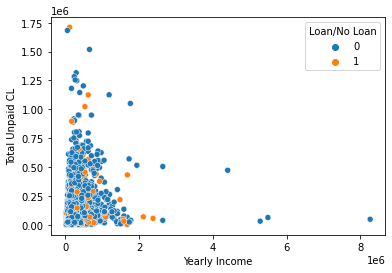

In [57]:
sns.scatterplot(data=data,x="Yearly Income",y="Total Unpaid CL",hue="Loan/No Loan")

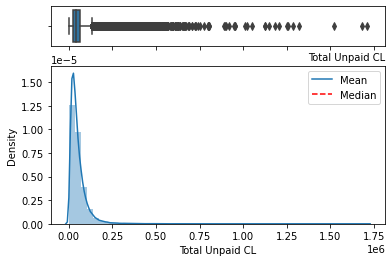

In [58]:
boxhist("Total Unpaid CL")

Feature: Due Fee

In [59]:
stats("Due Fee")

Variable: Due Fee
Type of variable: float64
Total observations: 87500
Missing values? False
Unique values: 608
Min: 0
25%: 0
Median: 0
75%: 0
Max: 169
Mean: 0.31640715210239984
Std dev: 3.5460871930781526
Variance: 12.57473438091289
Skewness: 16.587101982986688
Kurtosis: 381.6830450497362

Percentiles 1%, 5%, 95%, 99%


0.01     0.0
0.05     0.0
0.95     0.0
0.99    15.0
Name: Due Fee, dtype: float64

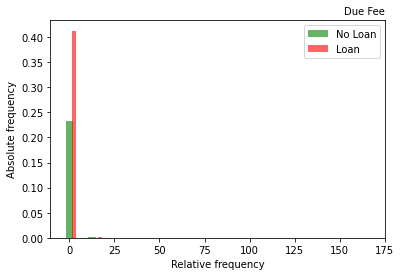

In [60]:
target("Due Fee")

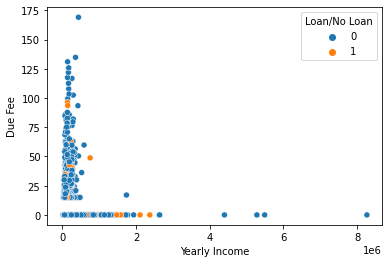

In [61]:
sns.scatterplot(data=data,x="Yearly Income",y="Due Fee",hue="Loan/No Loan")

Loan/No Loan,0,1
Reason,,
car,0.244382,0.000000
credit card,0.260125,0.191780
debt consolidation,0.373966,0.186473
home improvement,0.424914,0.160751
house,0.522977,0.000000
major purchase,0.399613,0.153643
medical,0.255364,0.093168
moving,0.506407,0.689421
other,0.326300,0.270833


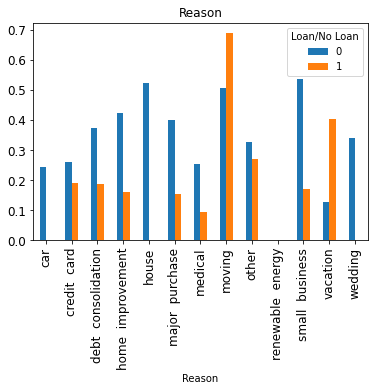

In [62]:
pivot_mean("Loan/No Loan", "Reason", "Due Fee")

Feature: Lend Amount

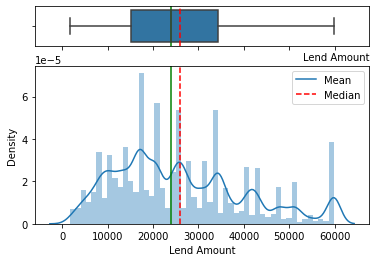

In [63]:
boxhist("Lend Amount")

In [64]:
stats("Lend Amount")

Variable: Lend Amount
Type of variable: float64
Total observations: 87500
Missing values? False
Unique values: 1298
Min: 1710
25%: 15048
Median: 23940
75%: 34200
Max: 59850
Mean: 25920.53568
Std dev: 14433.837213023235
Variance: 208335656.69205433
Skewness: 0.6400662236179349
Kurtosis: -0.3182657025004527

Percentiles 1%, 5%, 95%, 99%


0.01     3420.0
0.05     6840.0
0.95    55404.0
0.99    59850.0
Name: Lend Amount, dtype: float64

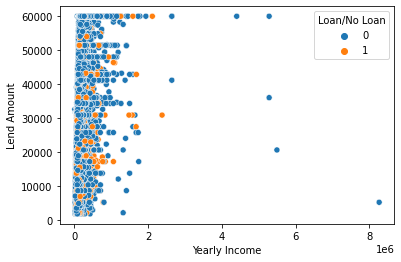

In [65]:
sns.scatterplot(data=data,x="Yearly Income",y="Lend Amount",hue="Loan/No Loan")

Loan/No Loan,0,1
Duration,,
3 years,1.041269e+09,2.758408e+08
5 years,8.281740e+08,1.227633e+08


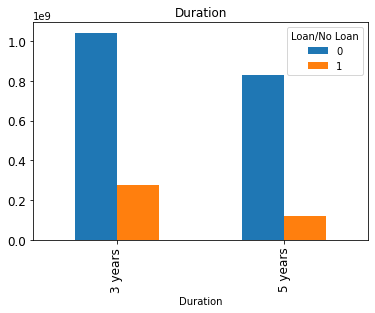

In [66]:
pivot_sum("Loan/No Loan", "Duration", "Lend Amount")

Feature: Loan/No Loan

In [67]:
stats("Loan/No Loan")

Variable: Loan/No Loan
Type of variable: int64
Total observations: 87500
Missing values? False
Unique values: 2
Min: 0
25%: 0
Median: 0
75%: 0
Max: 1
Mean: 0.18870857142857142
Std dev: 0.39127917936638296
Variance: 0.1530993962056301
Skewness: 1.5911565133581667
Kurtosis: 0.5317790500021187

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    1.0
Name: Loan/No Loan, dtype: float64

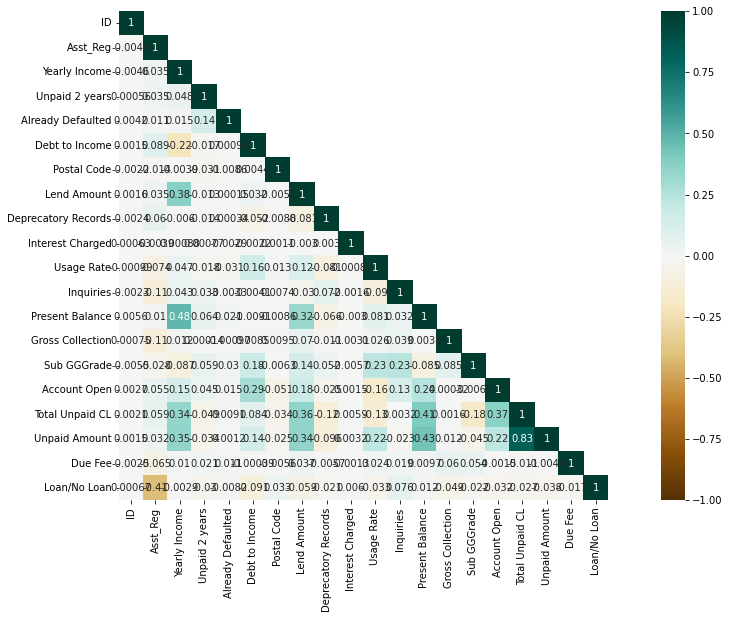

In [68]:
mask = np.triu(data.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [69]:
loan_no_loan_c = pg.pairwise_corr(data, columns=['Loan/No Loan'], method='pearson').loc[:,['X','Y','r']]
loan_no_loan_c.sort_values(by=['r'], ascending=False)

,X,Y,r
11,Loan/No Loan,Inquiries,0.076171
6,Loan/No Loan,Postal Code,0.032574
12,Loan/No Loan,Present Balance,0.011612
9,Loan/No Loan,Interest Charged,0.005988
0,Loan/No Loan,ID,0.000671
2,Loan/No Loan,Yearly Income,-0.002872
4,Loan/No Loan,Already Defaulted,-0.008235
18,Loan/No Loan,Due Fee,-0.017459
8,Loan/No Loan,Deprecatory Records,-0.021013
14,Loan/No Loan,Sub GGGrade,-0.022207


In [70]:
# heatmap Spearman
data_spear = data.copy()
data_spear.drop(["Loan/No Loan"], axis=1, inplace=True)
spearman_rank = pg.pairwise_corr(data_spear, method='spearman').loc[:,['X','Y','r']]
pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]
neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]
con = pd.concat([pos,neg], axis=0)
display(con.reset_index(drop=True))

,X,Y,r
0,Total Unpaid CL,Unpaid Amount,0.788424
1,Yearly Income,Present Balance,0.517058
2,Lend Amount,Unpaid Amount,0.501663
3,Yearly Income,Lend Amount,0.497424
4,Account Open,Total Unpaid CL,0.490603
5,Asst_Reg,Gross Collection,-0.167341
6,Deprecatory Records,Total Unpaid CL,-0.202553
7,Sub GGGrade,Total Unpaid CL,-0.228004
8,Yearly Income,Debt to Income,-0.229292
9,Deprecatory Records,Unpaid Amount,-0.236579


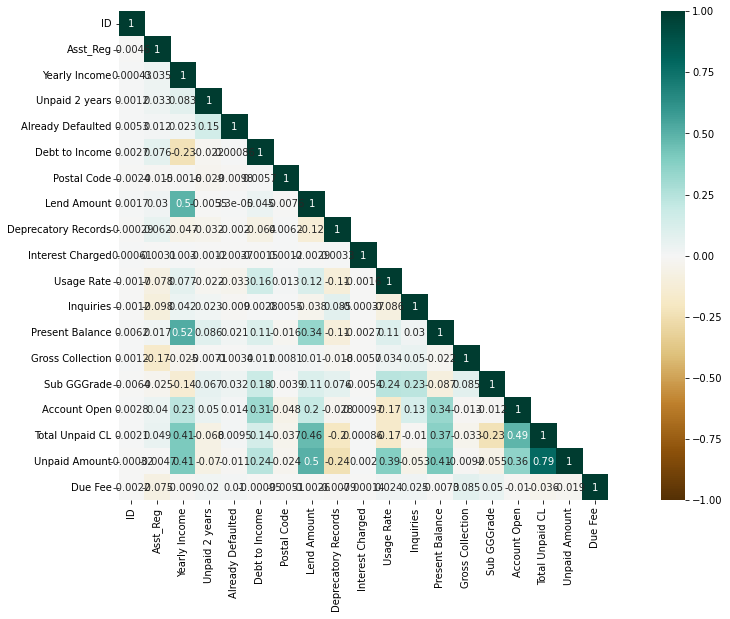

In [71]:
mask = np.triu(data_spear.corr(method='spearman'), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(data_spear.corr(method='spearman'), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

### Outliers

In [72]:
data_ca = data.select_dtypes(exclude=["int64","float64"]).copy()
data_nu = data.select_dtypes(exclude=["object","category"]).copy()

In [73]:
import math
def show_boxplots(cols: list, feature: str, show_fliers=True, data=data): #method call to show bloxplots
    """
    Shows boxplots from pandas data series
    cols: list of column names
    feature: dataframe categorical feature
    """
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        if show_fliers:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=True) 
        else:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

 With outliers 
 **************************************************


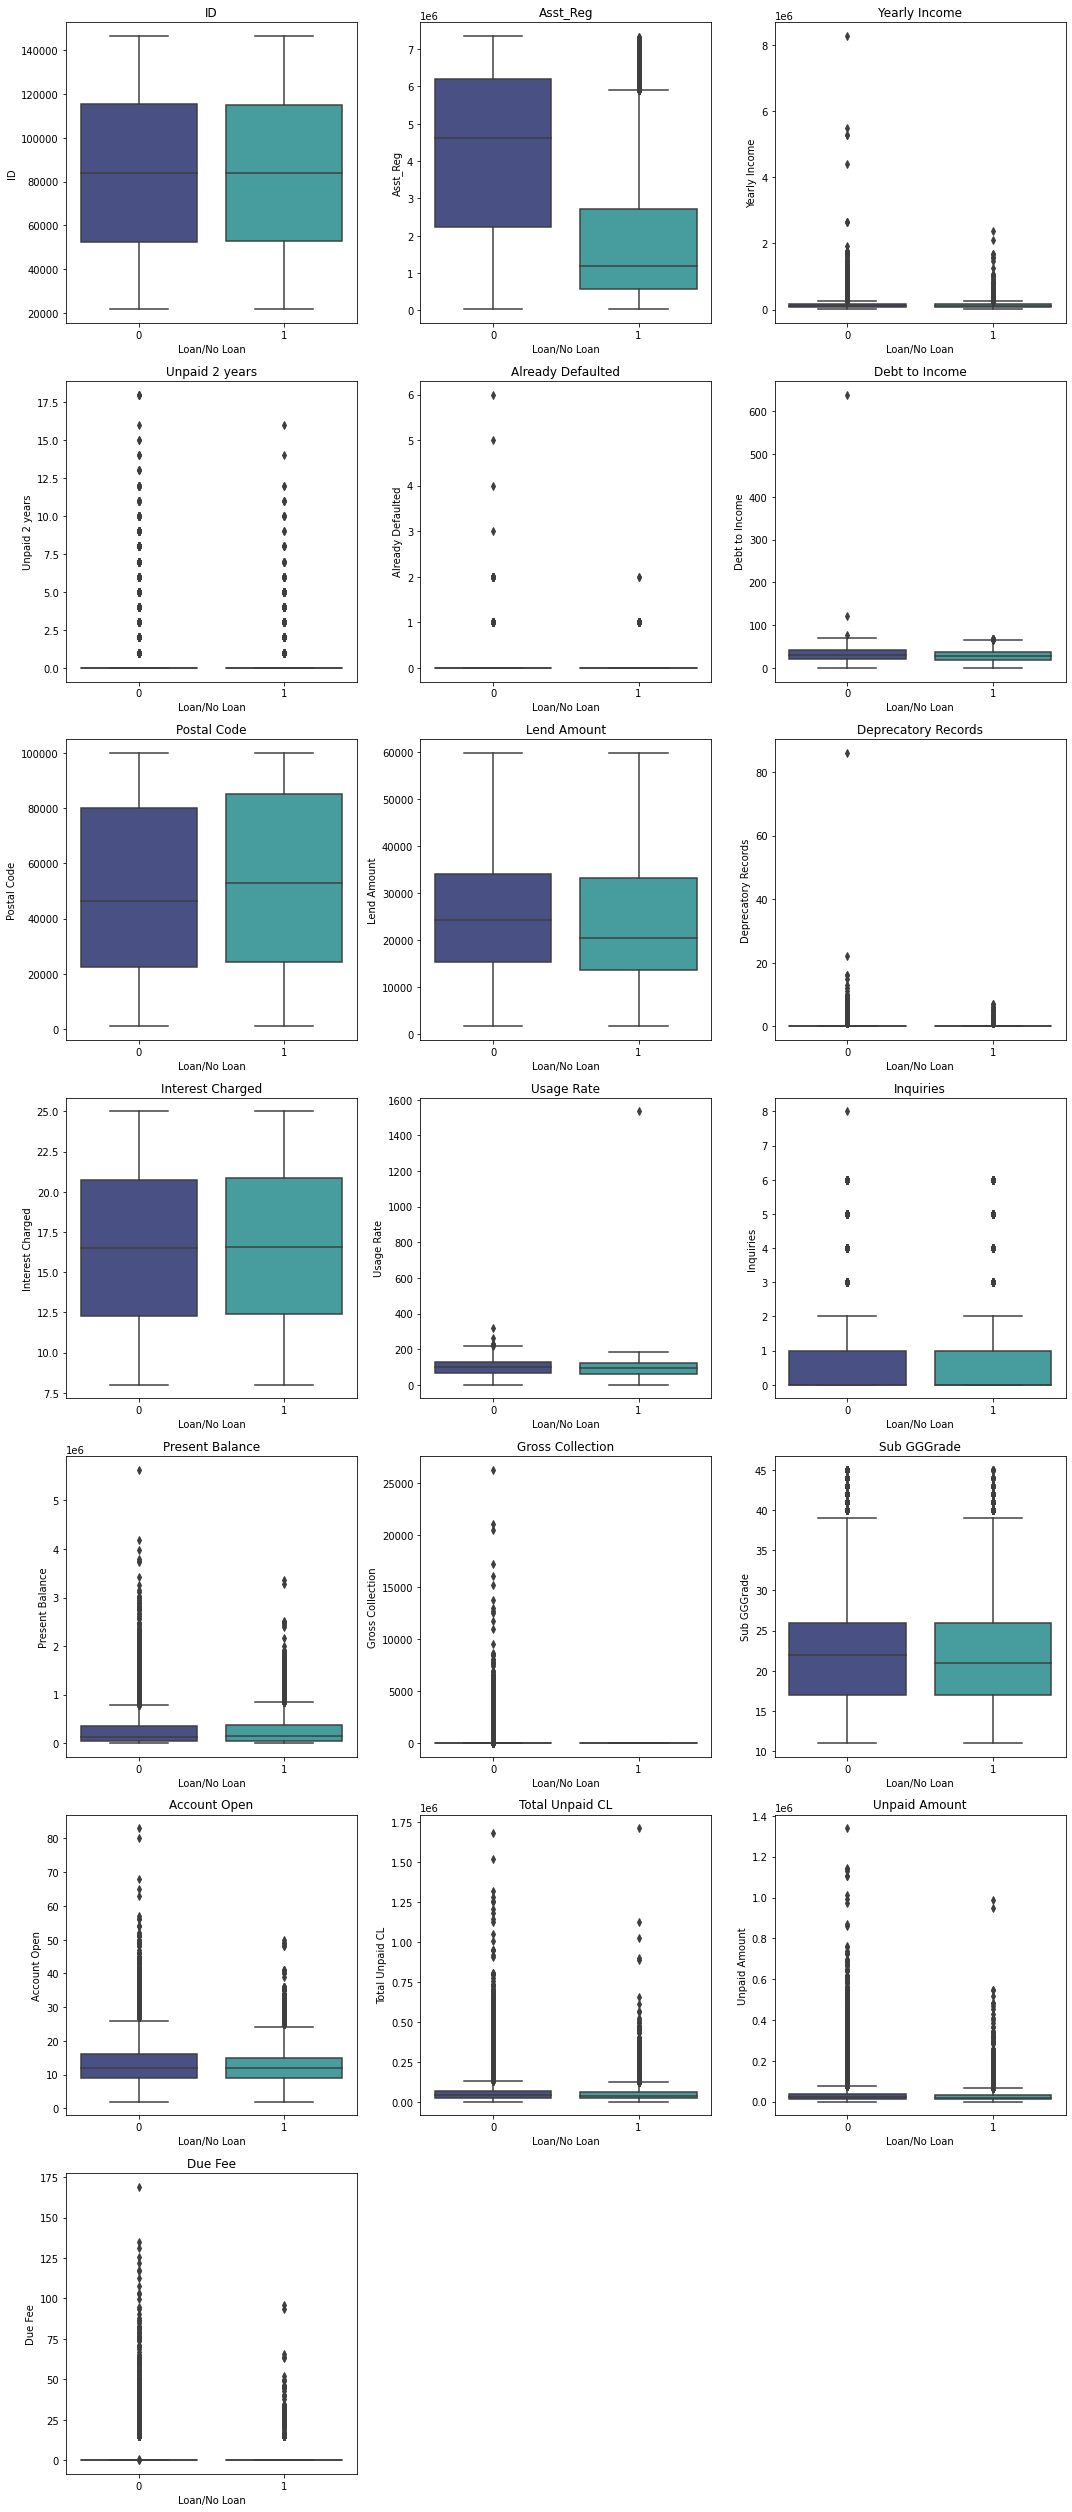

In [74]:
cols = data.select_dtypes(include=['integer', 'float']).columns.tolist()
cols.remove('Loan/No Loan')
print(' With outliers','\n','*'*50)
show_boxplots(cols=cols, feature='Loan/No Loan')

In [75]:
display(data.describe().loc[["mean","50%","std"]].loc[:,["Yearly Income","Unpaid 2 years","Due Fee"]])

,Yearly Income,Unpaid 2 years,Due Fee
mean,134859.629780,0.332937,0.316407
50%,114400.000000,0.000000,0.000000
std,98824.725562,0.876080,3.546087


count    8.192500e+04
mean     1.348596e+05
std      9.882473e+04
min      8.800000e+03
25%      8.324659e+04
50%      1.144000e+05
75%      1.601600e+05
max      8.264031e+06
Name: Yearly Income, dtype: float64


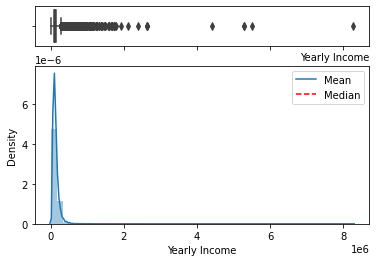

In [76]:
print(data['Yearly Income'].describe())
boxhist("Yearly Income")

count     77997.000000
mean     121240.253652
std       52340.342759
min        8800.000000
25%       80960.000000
50%      112640.000000
75%      151360.000000
max      275510.400000
Name: Yearly Income, dtype: float64


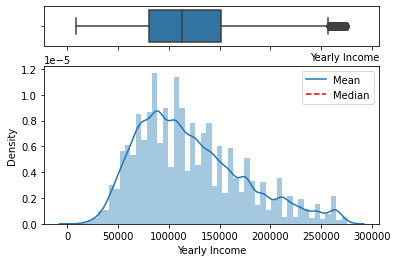

In [77]:
# Dealing with the outliers through IQR score method
Q1 = data['Yearly Income'].quantile(0.25)
Q3 = data['Yearly Income'].quantile(0.75)
IQR = Q3 - Q1
data['Yearly Income'] = data['Yearly Income'][~((data['Yearly Income'] < (Q1 - 1.5 * IQR)) |(data['Yearly Income'] > (Q3 + 1.5 * IQR)))]
print(data['Yearly Income'].describe())

boxhist("Yearly Income")

In [78]:
print(int(data_nu['Yearly Income'].describe()[0]) - int(data['Yearly Income'].describe()[0]),"outliers were removed with this operation.")

3928 outliers were removed with this operation.


In [79]:
print(data['Unpaid 2 years'].describe())

count    87500.000000
mean         0.332937
std          0.876080
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: Unpaid 2 years, dtype: float64


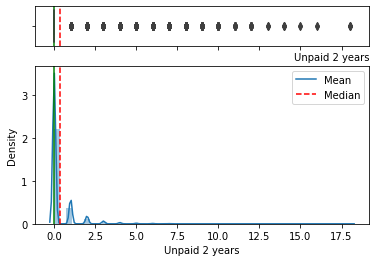

In [80]:
boxhist("Unpaid 2 years")

In [81]:
value = data['Unpaid 2 years'].quantile([.99999])
p = value.iloc[0]
data = data[data["Unpaid 2 years"] < p]

In [82]:
print(data['Unpaid 2 years'].describe())

count    87496.000000
mean         0.332129
std          0.867918
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: Unpaid 2 years, dtype: float64


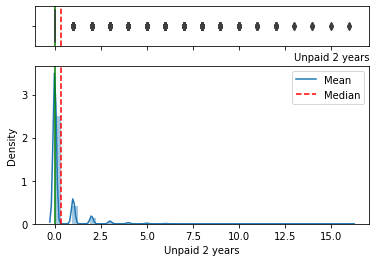

In [83]:
boxhist("Unpaid 2 years")

In [84]:
print(int(data_nu['Unpaid 2 years'].describe()[0]) - int(data['Unpaid 2 years'].describe()[0]),"outlier was removed with this operation.")

4 outlier was removed with this operation.


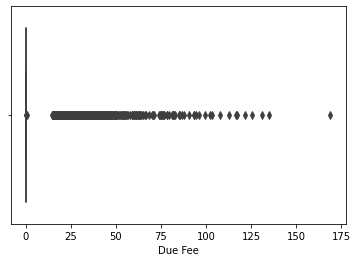

In [85]:
sns.boxplot(x=data['Due Fee'],data=data)
plt.xlabel('Due Fee', fontsize=10)
plt.show()

In [86]:
value = data['Due Fee'].quantile([.989])
p = value.iloc[0]
data = data[data["Due Fee"] < p]

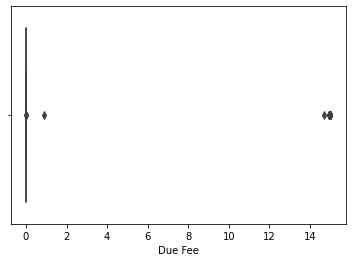

In [87]:
sns.boxplot(x=data['Due Fee'],data=data)
plt.xlabel('Due Fee', fontsize=10)
plt.show()

Although there is a significant number of data point distant from the upper quartile, I believe this is the case that those are not outliers, their values are significant for the target classification. Not removing any others.

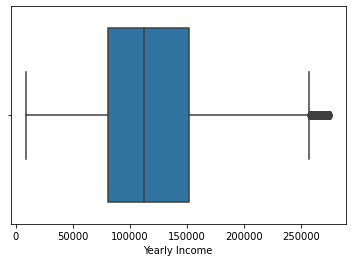

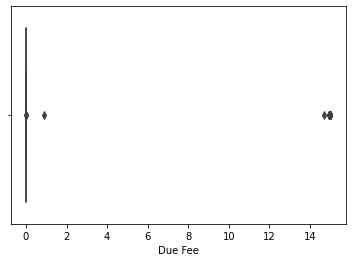

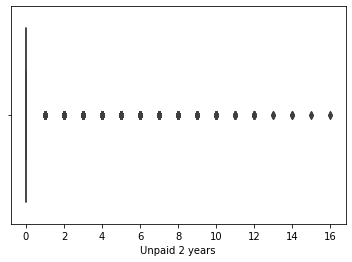

In [88]:
for col in data[["Yearly Income", "Due Fee", "Unpaid 2 years"]].columns:
    sns.boxplot(data[col])
    plt.show()

## Missing Values

In [89]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")

'Yearly Income': number of missing values '9410' ---> '10.874%'
'Designation': number of missing values '1396' ---> '1.613%'
'Debt to Income': number of missing values '3463' ---> '4.002%'
'Postal Code': number of missing values '1373' ---> '1.587%'
'Total Unpaid CL': number of missing values '4143' ---> '4.788%'
'Unpaid Amount': number of missing values '4798' ---> '5.545%'


In [90]:
data['Yearly Income'].value_counts(dropna=False)

NaN          9410
105600.00    3168
88000.00     2825
114400.00    2469
123200.00    2382
             ... 
55862.40        1
70394.72        1
185606.08       1
148705.92       1
90423.52        1
Name: Yearly Income, Length: 6357, dtype: int64

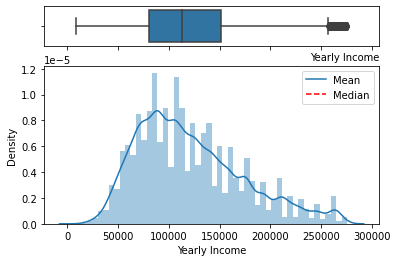

In [91]:
boxhist("Yearly Income")

In [92]:
data["Yearly Income"] = data['Yearly Income'].fillna(data['Yearly Income'].mean())
print(f"Fillna done. Anomalies detected: {data['Yearly Income'].isnull().values.any()}")

Fillna done. Anomalies detected: False


In [93]:
test['Yearly Income'].isna().sum()

2425

In [94]:
test["Yearly Income"] = test['Yearly Income'].fillna(test['Yearly Income'].mean())
print(f"Fillna done. Anomalies detected: {test['Yearly Income'].isnull().values.any()}")

Fillna done. Anomalies detected: False


In [95]:
data['Home Status'].value_counts()

Mortgage    43712
Rent        34501
OWN          8310
OTHER           6
NONE            4
Name: Home Status, dtype: int64

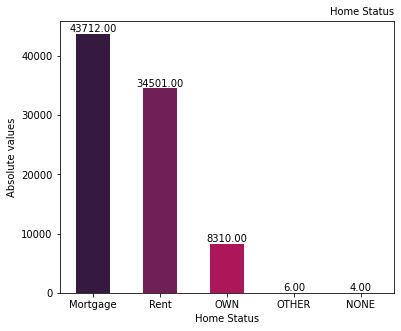

In [96]:
bar("Home Status")

In [97]:
data["Home Status"] = data['Home Status'].fillna(data["Home Status"].value_counts().index[0])
print(f"Imputation done. Missing values: {data['Home Status'].isnull().sum()}")

Imputation done. Missing values: 0


In [98]:
test['Home Status'].isna().sum()

0

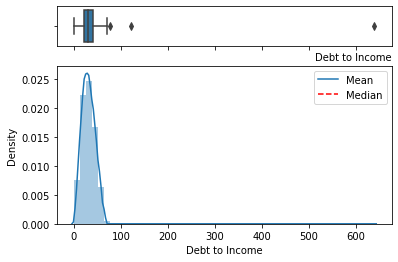

In [99]:
boxhist("Debt to Income")

In [100]:
data["Debt to Income"] = data['Debt to Income'].fillna(data['Debt to Income'].mean())
print(f"Fillna done. Missing values: {data['Debt to Income'].isnull().values.any()}")

Fillna done. Missing values: False


In [101]:
test['Debt to Income'].isna().sum()

1511

In [102]:
test["Debt to Income"] = test['Debt to Income'].fillna(test['Debt to Income'].mean())
print(f"Fillna done. Missing values: {test['Debt to Income'].isnull().values.any()}")

Fillna done. Missing values: False


In [103]:
abs_mv = data["Unpaid 2 years"].value_counts(dropna=False)
pc_mv = data["Unpaid 2 years"].value_counts(dropna=False, normalize=True) * 100
pc_mv_df = pd.DataFrame(pc_mv)
pc_mv_df.rename(columns={"Unpaid 2 years":"Percent %"}, inplace=True)
abs_pc = pd.concat([abs_mv,pc_mv_df], axis=1)
abs_pc

,Unpaid 2 years,Percent %
0,69071,79.820415
1,11453,13.235413
2,3592,4.151018
3,1244,1.437602
4,556,0.642529
5,270,0.312020
6,153,0.176811
7,67,0.077427
8,42,0.048536
9,24,0.027735


In [104]:
data.isna().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income             0
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1396
Debt to Income            0
Postal Code            1373
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4143
Duration                  0
Unpaid Amount          4798
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

In [105]:
data["Total Unpaid CL"] = data['Total Unpaid CL'].fillna(data['Total Unpaid CL'].mean())
print(f"Fillna done. Missing values: {data['Total Unpaid CL'].isnull().values.any()}")

Fillna done. Missing values: False


In [106]:
test['Total Unpaid CL'].isna().sum()

1814

In [107]:
test["Total Unpaid CL"] = test['Total Unpaid CL'].fillna(test['Total Unpaid CL'].mean())
print(f"Fillna done. Missing values: {test['Total Unpaid CL'].isnull().values.any()}")

Fillna done. Missing values: False


In [108]:
data["Unpaid Amount"] = data['Unpaid Amount'].fillna(data['Unpaid Amount'].mean())
print(f"Fillna done. Missing values: {data['Unpaid Amount'].isnull().values.any()}")

Fillna done. Missing values: False


In [109]:
test['Unpaid Amount'].isna().sum()

2069

In [110]:
test["Unpaid Amount"] = test['Unpaid Amount'].fillna(test['Unpaid Amount'].mean())
print(f"Fillna done. Missing values: {test['Unpaid Amount'].isnull().values.any()}")

Fillna done. Missing values: False


In [111]:
test.isna().sum()

ID                       0
Asst_Reg                 0
GGGrade                  0
Experience               0
Validation               0
Yearly Income            0
Home Status              0
Unpaid 2 years           0
Already Defaulted        0
Designation            586
Debt to Income           0
Postal Code            611
Lend Amount              0
Deprecatory Records      0
Interest Charged         0
Usage Rate               0
Inquiries                0
Present Balance          0
Gross Collection         0
Sub GGGrade              0
File Status              0
State                    0
Account Open             0
Total Unpaid CL          0
Duration                 0
Unpaid Amount            0
Reason                   0
Claim Type               0
Due Fee                  0
dtype: int64

In [112]:
data.isna().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income             0
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1396
Debt to Income            0
Postal Code            1373
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL           0
Duration                  0
Unpaid Amount             0
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

Feature Selection

In [113]:
data.drop(["ID","Designation","Postal Code"], axis=1, inplace=True)

In [114]:
test.drop(["ID","Designation","Postal Code"], axis=1, inplace=True)

In [115]:
#Numerical Features and Categorical/Binary Target
#Selecting numeric variables only:
data_nu = data.select_dtypes(exclude=["object","category"]).copy()

In [116]:
#Creating subsets:
Xnum = data_nu.drop(["Loan/No Loan"], axis= "columns")
ynum = data_nu['Loan/No Loan']

In [117]:
# Identifying the predictive features using the Pearson Correlation p-value
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
Asst_Reg,-0.4177,0.0000
Yearly Income,0.0119,0.0005
Unpaid 2 years,-0.0291,0.0000
Already Defaulted,-0.0087,0.0104
Debt to Income,-0.0890,0.0000
Lend Amount,-0.0599,0.0000
Deprecatory Records,-0.0210,0.0000
Interest Charged,0.0058,0.0867
Usage Rate,-0.0330,0.0000
Inquiries,0.0780,0.0000


Strategy: Drop ‘Interest Charged’ (p-value > 0.05) → low information to the target, and keep all the others.

In [118]:
data.drop(['Interest Charged'], axis=1, inplace=True)

In [119]:
test.drop(['Interest Charged'], axis=1, inplace=True)

In [120]:
data.isna().sum()

Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Debt to Income         0
Lend Amount            0
Deprecatory Records    0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

In [121]:
test.isna().sum()

Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Debt to Income         0
Lend Amount            0
Deprecatory Records    0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
dtype: int64

In [122]:
# Categorical Features and Categorical/Binary Target
# Selecting categoric variables only:
Xcat = data.select_dtypes(exclude=['int64','float64']).copy()

In [123]:
# Creating subsets:

Xcat['target'] = data['Loan/No Loan']
Xcat.dropna(how="any", inplace=True)
ycat = Xcat.target
Xcat.drop("target", axis=1, inplace=True)

In [124]:
# Chi-square test for independence:

for col in Xcat.columns:
    table = pd.crosstab(Xcat[col], ycat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

target,0,1
GGGrade,,
I,11467,2652
II,19592,5174
III,19981,4395
IV,11044,2587
V,5903,1120
VI,1752,378
VII,389,99


p-value: 0.0000000000000000000000383



target,0,1
Experience,,
1yrs,4736,1044
2yrs,6426,1540
3yrs,5930,1330
4yrs,4291,978
5yrs,4464,1090
6yrs,3236,964
7yrs,3661,1047
8yrs,3709,852
9yrs,2850,719


p-value: 0.0000000000000000068526852



target,0,1
Validation,,
Not Vfied,20411,5671
Source Verified,29137,5014
Vfied,20580,5720


p-value: 0.0000000000000000000000000



target,0,1
Home Status,,
Mortgage,35081,8631
NONE,0,4
OTHER,2,4
OWN,6896,1414
Rent,28149,6352


p-value: 0.0000000000000158424178149



target,0,1
File Status,,
fully paid,30468,10145
whole,39660,6260


p-value: 0.0000000000000000000000000



target,0,1
State,,
AK,170,43
AL,918,213
AR,526,116
AZ,1627,413
CO,1499,362
CT,1098,209
California,9755,2731
DC,172,61
DE,199,37


p-value: 0.0000000000000000000000000



target,0,1
Duration,,
3 years,46552,12867
5 years,23576,3538


p-value: 0.0000000000000000000000000



target,0,1
Reason,,
car,546,160
credit card,17309,3602
debt consolidation,41873,10091
home improvement,3867,954
house,210,96
major purchase,1204,289
medical,654,160
moving,399,91
other,3056,666


p-value: 0.0000000000000000000000000



target,0,1
Claim Type,,
I,70082,16405
J,46,0


p-value: 0.0019807585263649841490763


Strategy: Keep all features (p-value < 0.05). The categorical variables have predictive power.

### ENCODING & TRANSFORMATIONS
Let’s continue by encoding and transforming the categorical variables into numeric ones.

The feature ‘grade’ is a scale which means i’ll be mapping it to numbers. On the other hand, concerning the variables ‘duration’, ‘Home Status’ and ‘Reason’, we need to inspect and decide which procedure (OHE or Binary Encoding) is the best option.

In [125]:
loan_grade = {'I':0, 'II':1, 'III':2, 'IV':3, 'V':4, 'VI':5, 'VII':6}
data['GGGrade'] = data['GGGrade'].map(loan_grade).astype('Int32')

In [126]:
loan_grade = {'I':0, 'II':1, 'III':2, 'IV':3, 'V':4, 'VI':5, 'VII':6}
test['GGGrade'] = test['GGGrade'].map(loan_grade).astype('Int32')

### Variables: ‘Duration’, ‘Home Status’, ‘Reason’
One Hot Encoding and Binary Encoding will be both displayed so we can chose the best to apply.

In [127]:
df_duration = data['Duration']
df_home = data['Home Status']
df_reason = data.Reason

In [128]:
#duration
t_ohe = pd.get_dummies(df_duration)
bin_enc_term = BinaryEncoder()
t_bin = bin_enc_term.fit_transform(df_duration)

In [129]:
t_bin

,Duration_0,Duration_1
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
87495,0,1
87496,1,0
87497,0,1
87498,0,1


In [130]:
#home_ownsership
h_ohe = pd.get_dummies(df_home)
bin_enc_home = BinaryEncoder()
h_bin = bin_enc_home.fit_transform(df_home)

In [131]:
#reason
p_ohe = pd.get_dummies(df_reason)
bin_enc_reason = BinaryEncoder()
p_bin = bin_enc_reason.fit_transform(df_reason)

In [132]:
data.Validation.replace('Source Verified','Vfied', inplace=True)
data.Validation.value_counts().sort_values(ascending=False)

Vfied        60451
Not Vfied    26082
Name: Validation, dtype: int64

In [133]:
test.Validation.replace('Source Verified','Vfied', inplace=True)
test.Validation.value_counts().sort_values(ascending=False)

Vfied        26012
Not Vfied    11488
Name: Validation, dtype: int64

In [134]:
data['Home Status'].replace('NONE','OTHER', inplace=True)
data['Home Status'].value_counts().sort_values(ascending=False)

Mortgage    43712
Rent        34501
OWN          8310
OTHER          10
Name: Home Status, dtype: int64

In [135]:
test['Home Status'].replace('NONE','OTHER', inplace=True)
test['Home Status'].value_counts().sort_values(ascending=False)

Mortgage    18912
Rent        14992
OWN          3592
OTHER           4
Name: Home Status, dtype: int64

In [136]:
# One Hot Encoding (OHE)
data = pd.get_dummies(data, columns=["Duration","Home Status","Validation"])

In [137]:
# One Hot Encoding (OHE)
test = pd.get_dummies(test, columns=["Duration","Home Status","Validation"])

In [138]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Asst_Reg              37500 non-null  int64  
 1   GGGrade               37500 non-null  Int32  
 2   Experience            37500 non-null  object 
 3   Yearly Income         37500 non-null  float64
 4   Unpaid 2 years        37500 non-null  int64  
 5   Already Defaulted     37500 non-null  int64  
 6   Debt to Income        37500 non-null  float64
 7   Lend Amount           37500 non-null  float64
 8   Deprecatory Records   37500 non-null  int64  
 9   Usage Rate            37500 non-null  float64
 10  Inquiries             37500 non-null  int64  
 11  Present Balance       37500 non-null  float64
 12  Gross Collection      37500 non-null  float64
 13  Sub GGGrade           37500 non-null  int64  
 14  File Status           37500 non-null  object 
 15  State              

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86533 entries, 0 to 87499
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Asst_Reg              86533 non-null  int64  
 1   GGGrade               86533 non-null  Int32  
 2   Experience            86533 non-null  object 
 3   Yearly Income         86533 non-null  float64
 4   Unpaid 2 years        86533 non-null  int64  
 5   Already Defaulted     86533 non-null  int64  
 6   Debt to Income        86533 non-null  float64
 7   Lend Amount           86533 non-null  float64
 8   Deprecatory Records   86533 non-null  int64  
 9   Usage Rate            86533 non-null  float64
 10  Inquiries             86533 non-null  int64  
 11  Present Balance       86533 non-null  float64
 12  Gross Collection      86533 non-null  float64
 13  Sub GGGrade           86533 non-null  int64  
 14  File Status           86533 non-null  object 
 15  State              

In [140]:
#Binary Encoding
bin_enc_reason = BinaryEncoder()
data_bin = bin_enc_reason.fit_transform(data.Reason)

In [141]:
# Concatenating both datasets
df = pd.concat([data,data_bin],axis=1)
# Dropping 'Reason'
df.drop(["Reason"], axis=1, inplace=True)
# Lowering upper characters
df.columns = [x.lower() for x in df.columns]
# printing 5 first rows
df.head()

,asst_reg,gggrade,experience,yearly income,unpaid 2 years,already defaulted,debt to income,lend amount,deprecatory records,usage rate,...,home status_mortgage,home status_other,home status_own,home status_rent,validation_not vfied,validation_vfied,reason_0,reason_1,reason_2,reason_3
0,421802,1,>10yrs,121271.38735,0,0,12.5496,42023.25,0,88.924,...,1,0,0,0,0,1,0,0,0,1
1,3964312,3,7yrs,85483.20000,0,0,9.0048,38133.00,0,102.856,...,0,0,0,1,0,1,0,0,0,1
2,4247560,2,<1yr,79200.00000,0,0,24.9144,17100.00,0,60.372,...,0,0,0,1,0,1,0,0,1,0
3,197179,2,<1yr,61600.00000,0,0,16.5816,5130.00,0,116.272,...,0,0,0,1,0,1,0,0,1,0
4,4646684,4,2yrs,68053.92000,0,0,40.0512,19665.00,0,127.280,...,0,0,0,1,0,1,0,0,0,1


In [142]:
#Binary Encoding
bin_enc_reason = BinaryEncoder()
data_bin = bin_enc_reason.fit_transform(test.Reason)

In [143]:
# Concatenating both datasets
df_test = pd.concat([test,data_bin],axis=1)
# Dropping 'Reason'
df_test.drop(["Reason"], axis=1, inplace=True)
# Lowering upper characters
df_test.columns = [x.lower() for x in df_test.columns]
# printing 5 first rows
df_test.head()

,asst_reg,gggrade,experience,yearly income,unpaid 2 years,already defaulted,debt to income,lend amount,deprecatory records,usage rate,...,home status_mortgage,home status_other,home status_own,home status_rent,validation_not vfied,validation_vfied,reason_0,reason_1,reason_2,reason_3
0,1773284,1,2yrs,140800.00,0,0,16.9176,17955.00,0,78.432,...,0,0,1,0,0,1,0,0,0,1
1,5298273,1,>10yrs,146080.00,0,0,28.6944,59850.00,0,76.368,...,1,0,0,0,0,1,0,0,1,0
2,189781,5,>10yrs,202222.24,0,0,51.1560,59850.00,0,157.552,...,1,0,0,0,0,1,0,0,1,0
3,1530906,1,>10yrs,105600.00,1,0,27.0144,19323.00,0,32.852,...,1,0,0,0,0,1,0,0,1,1
4,4410316,2,4yrs,151360.00,0,0,10.3824,25350.75,1,108.532,...,1,0,0,0,1,0,0,0,1,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86533 entries, 0 to 87499
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   asst_reg              86533 non-null  int64  
 1   gggrade               86533 non-null  Int32  
 2   experience            86533 non-null  object 
 3   yearly income         86533 non-null  float64
 4   unpaid 2 years        86533 non-null  int64  
 5   already defaulted     86533 non-null  int64  
 6   debt to income        86533 non-null  float64
 7   lend amount           86533 non-null  float64
 8   deprecatory records   86533 non-null  int64  
 9   usage rate            86533 non-null  float64
 10  inquiries             86533 non-null  int64  
 11  present balance       86533 non-null  float64
 12  gross collection      86533 non-null  float64
 13  sub gggrade           86533 non-null  int64  
 14  file status           86533 non-null  object 
 15  state              

In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   asst_reg              37500 non-null  int64  
 1   gggrade               37500 non-null  Int32  
 2   experience            37500 non-null  object 
 3   yearly income         37500 non-null  float64
 4   unpaid 2 years        37500 non-null  int64  
 5   already defaulted     37500 non-null  int64  
 6   debt to income        37500 non-null  float64
 7   lend amount           37500 non-null  float64
 8   deprecatory records   37500 non-null  int64  
 9   usage rate            37500 non-null  float64
 10  inquiries             37500 non-null  int64  
 11  present balance       37500 non-null  float64
 12  gross collection      37500 non-null  float64
 13  sub gggrade           37500 non-null  int64  
 14  file status           37500 non-null  object 
 15  state              

In [146]:
experience = {'<1yr':0, '1yrs':1, '2yrs':2,'3yrs':3,'4yrs':4,'5yrs':5,'6yrs':6,'7yrs':7,'8yrs':8,
              '9yrs':9,'>10yrs':10}
df['experience'] = df['experience'].map(experience).astype('Int32')

In [147]:
experience = {'<1yr':0, '1yrs':1, '2yrs':2,'3yrs':3,'4yrs':4,'5yrs':5,'6yrs':6,'7yrs':7,'8yrs':8,
              '9yrs':9,'>10yrs':10}
df_test['experience'] = df_test['experience'].map(experience).astype('Int32')

In [148]:
# One Hot Encoding (OHE)
df = pd.get_dummies(df, columns=["file status"])

In [149]:
# One Hot Encoding (OHE)
df_test = pd.get_dummies(df_test, columns=["file status"])

In [150]:
try:
    df.drop(['state'], axis=1, inplace=True)
except:
    print("state column already dropped")
df.columns

Index(['asst_reg', 'gggrade', 'experience', 'yearly income', 'unpaid 2 years',
       'already defaulted', 'debt to income', 'lend amount',
       'deprecatory records', 'usage rate', 'inquiries', 'present balance',
       'gross collection', 'sub gggrade', 'account open', 'total unpaid cl',
       'unpaid amount', 'claim type', 'due fee', 'loan/no loan',
       'duration_3 years', 'duration_5 years', 'home status_mortgage',
       'home status_other', 'home status_own', 'home status_rent',
       'validation_not vfied', 'validation_vfied', 'reason_0', 'reason_1',
       'reason_2', 'reason_3', 'file status_fully paid', 'file status_whole'],
      dtype='object')

In [151]:
try:
    df_test.drop(['state'], axis=1, inplace=True)
except:
    print("stae column already dropped")
df_test.columns

Index(['asst_reg', 'gggrade', 'experience', 'yearly income', 'unpaid 2 years',
       'already defaulted', 'debt to income', 'lend amount',
       'deprecatory records', 'usage rate', 'inquiries', 'present balance',
       'gross collection', 'sub gggrade', 'account open', 'total unpaid cl',
       'unpaid amount', 'claim type', 'due fee', 'duration_3 years',
       'duration_5 years', 'home status_mortgage', 'home status_other',
       'home status_own', 'home status_rent', 'validation_not vfied',
       'validation_vfied', 'reason_0', 'reason_1', 'reason_2', 'reason_3',
       'file status_fully paid', 'file status_whole'],
      dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86533 entries, 0 to 87499
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   asst_reg                86533 non-null  int64  
 1   gggrade                 86533 non-null  Int32  
 2   experience              86533 non-null  Int32  
 3   yearly income           86533 non-null  float64
 4   unpaid 2 years          86533 non-null  int64  
 5   already defaulted       86533 non-null  int64  
 6   debt to income          86533 non-null  float64
 7   lend amount             86533 non-null  float64
 8   deprecatory records     86533 non-null  int64  
 9   usage rate              86533 non-null  float64
 10  inquiries               86533 non-null  int64  
 11  present balance         86533 non-null  float64
 12  gross collection        86533 non-null  float64
 13  sub gggrade             86533 non-null  int64  
 14  account open            86533 non-null

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   asst_reg                37500 non-null  int64  
 1   gggrade                 37500 non-null  Int32  
 2   experience              37500 non-null  Int32  
 3   yearly income           37500 non-null  float64
 4   unpaid 2 years          37500 non-null  int64  
 5   already defaulted       37500 non-null  int64  
 6   debt to income          37500 non-null  float64
 7   lend amount             37500 non-null  float64
 8   deprecatory records     37500 non-null  int64  
 9   usage rate              37500 non-null  float64
 10  inquiries               37500 non-null  int64  
 11  present balance         37500 non-null  float64
 12  gross collection        37500 non-null  float64
 13  sub gggrade             37500 non-null  int64  
 14  account open            37500 non-null

In [154]:
# One Hot Encoding (OHE)
df = pd.get_dummies(df, columns=["claim type"])

In [155]:
# One Hot Encoding (OHE)
df_test = pd.get_dummies(df_test, columns=["claim type"])

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86533 entries, 0 to 87499
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   asst_reg                86533 non-null  int64  
 1   gggrade                 86533 non-null  Int32  
 2   experience              86533 non-null  Int32  
 3   yearly income           86533 non-null  float64
 4   unpaid 2 years          86533 non-null  int64  
 5   already defaulted       86533 non-null  int64  
 6   debt to income          86533 non-null  float64
 7   lend amount             86533 non-null  float64
 8   deprecatory records     86533 non-null  int64  
 9   usage rate              86533 non-null  float64
 10  inquiries               86533 non-null  int64  
 11  present balance         86533 non-null  float64
 12  gross collection        86533 non-null  float64
 13  sub gggrade             86533 non-null  int64  
 14  account open            86533 non-null

In [157]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   asst_reg                37500 non-null  int64  
 1   gggrade                 37500 non-null  Int32  
 2   experience              37500 non-null  Int32  
 3   yearly income           37500 non-null  float64
 4   unpaid 2 years          37500 non-null  int64  
 5   already defaulted       37500 non-null  int64  
 6   debt to income          37500 non-null  float64
 7   lend amount             37500 non-null  float64
 8   deprecatory records     37500 non-null  int64  
 9   usage rate              37500 non-null  float64
 10  inquiries               37500 non-null  int64  
 11  present balance         37500 non-null  float64
 12  gross collection        37500 non-null  float64
 13  sub gggrade             37500 non-null  int64  
 14  account open            37500 non-null

In [158]:
df.dtypes

asst_reg                    int64
gggrade                     Int32
experience                  Int32
yearly income             float64
unpaid 2 years              int64
already defaulted           int64
debt to income            float64
lend amount               float64
deprecatory records         int64
usage rate                float64
inquiries                   int64
present balance           float64
gross collection          float64
sub gggrade                 int64
account open                int64
total unpaid cl           float64
unpaid amount             float64
due fee                   float64
loan/no loan                int64
duration_3 years            uint8
duration_5 years            uint8
home status_mortgage        uint8
home status_other           uint8
home status_own             uint8
home status_rent            uint8
validation_not vfied        uint8
validation_vfied            uint8
reason_0                    int64
reason_1                    int64
reason_2      

In [159]:
df_test.dtypes

asst_reg                    int64
gggrade                     Int32
experience                  Int32
yearly income             float64
unpaid 2 years              int64
already defaulted           int64
debt to income            float64
lend amount               float64
deprecatory records         int64
usage rate                float64
inquiries                   int64
present balance           float64
gross collection          float64
sub gggrade                 int64
account open                int64
total unpaid cl           float64
unpaid amount             float64
due fee                   float64
duration_3 years            uint8
duration_5 years            uint8
home status_mortgage        uint8
home status_other           uint8
home status_own             uint8
home status_rent            uint8
validation_not vfied        uint8
validation_vfied            uint8
reason_0                    int64
reason_1                    int64
reason_2                    int64
reason_3      

In [160]:
df.isna().sum()

asst_reg                  0
gggrade                   0
experience                0
yearly income             0
unpaid 2 years            0
already defaulted         0
debt to income            0
lend amount               0
deprecatory records       0
usage rate                0
inquiries                 0
present balance           0
gross collection          0
sub gggrade               0
account open              0
total unpaid cl           0
unpaid amount             0
due fee                   0
loan/no loan              0
duration_3 years          0
duration_5 years          0
home status_mortgage      0
home status_other         0
home status_own           0
home status_rent          0
validation_not vfied      0
validation_vfied          0
reason_0                  0
reason_1                  0
reason_2                  0
reason_3                  0
file status_fully paid    0
file status_whole         0
claim type_I              0
claim type_J              0
dtype: int64

In [161]:
df_test.isna().sum()

asst_reg                  0
gggrade                   0
experience                0
yearly income             0
unpaid 2 years            0
already defaulted         0
debt to income            0
lend amount               0
deprecatory records       0
usage rate                0
inquiries                 0
present balance           0
gross collection          0
sub gggrade               0
account open              0
total unpaid cl           0
unpaid amount             0
due fee                   0
duration_3 years          0
duration_5 years          0
home status_mortgage      0
home status_other         0
home status_own           0
home status_rent          0
validation_not vfied      0
validation_vfied          0
reason_0                  0
reason_1                  0
reason_2                  0
reason_3                  0
file status_fully paid    0
file status_whole         0
claim type_I              0
claim type_J              0
dtype: int64

MACHINE LEARNING: Predictive modeling
We’re dealing with a supervised binary problem using classification techniques.

Given that we have unbalanced data, we’ll use AUC ROC as the best metric to evaluate the performance of the following models.

In [172]:
from sklearn.metrics import classification_report,f1_score

In [168]:
X = df.drop(['loan/no loan'], axis=1)
y = df['loan/no loan']

In [169]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)
print(X_train.shape, X_test.shape)

(60573, 34) (25960, 34)


In [170]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    '''
    model : classifier to predict values of X
    flag: Flag to print metric score dataframe. (default=True)
    '''
    # defining an empty list to store train and test results
    scores = []   
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    scores.extend(
        (
            train_acc, test_acc, 
            train_recall, test_recall, 
            train_precision, test_precision,
            train_f1, test_f1
        )
    )  
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        metric_names = [
            'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall',
            'Train Precision', 'Test Precision', 'Train F1-Score', 'Test F1-Score'
        ]
        cols = ['Metric', 'Score']
        records = [(name, score) for name, score in zip(metric_names, scores)]
        display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)

    return scores # returning the list with train and test scores

In [171]:
## Function to create confusion matrix
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["No", "Yes"], columns=["No", "Yes"])
    
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel("Actual", fontsize=14)
    plt.xlabel("Predicted", fontsize=14);

In [172]:
def show_model_performance(model: list, model_names: list):
    results = []
    for model, name in zip(models, model_names):
        (acc_train, acc_test,
         recall_train, recall_test,
         precision_train, precision_test,
         f1_train, f1_test) = get_metrics_score(model, False)
    
        results.append((name, acc_train, acc_test, recall_train, recall_test,
                    precision_train, precision_test, f1_train, f1_test))

    cols = [
        'Model', 'Train Acc', 'Test Accuracy', 'Train Recall', 
        'Test Recall', 'Train Precision', 'Test Precision', 
        'Train F1-Score', 'Test F1-Score'
    ]

    comparison_frame = pd.DataFrame.from_records(results, columns=cols, index='Model') 
    # Sorting models in decreasing order of test f1-score
    display(comparison_frame.sort_values(by='Test F1-Score', ascending=False))

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.782576,0.778737,0.703126,0.679805,0.452705,0.445302,0.550788,0.538115


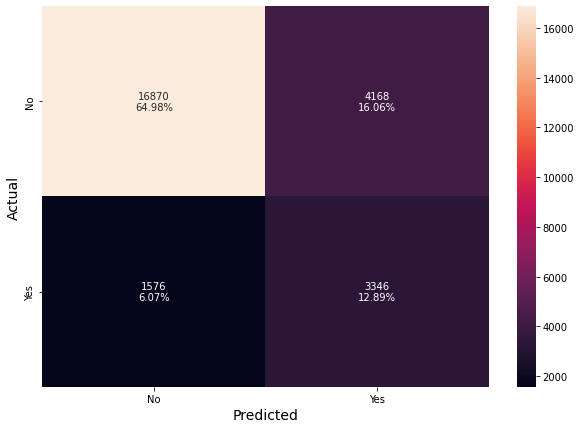

In [185]:
from sklearn import metrics
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)
# Creating new pipeline with best parameters
xgb_tuned = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1234,
        n_estimators=235,
        scale_pos_weight=3,
        reg_lambda=1,
        max_depth=5,
        subsample=0.9,
        learning_rate=0.02,
        gamma=0,
        eval_metric='logloss',
        n_jobs=-1,
        scoring=scorer
    )
)

# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned, y_test)

In [186]:
pred = xgb_tuned.predict(df_test)
print(f"Prediction has length: {len(pred)}")

Prediction has length: 37500


In [187]:
prediction_dict = {
    'ID': test_id,
    'Loan/No Loan': pred
}
submit_df6 = pd.DataFrame(prediction_dict)
submit_df6.head()

,ID,Loan/No Loan
0,198980,1
1,167688,0
2,198768,1
3,192564,1
4,151199,0


In [188]:
submit_df6.to_csv('submit_df6.csv', index=False)

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.853648,0.831626,0.430811,0.366721,0.679907,0.590062,0.527427,0.452324


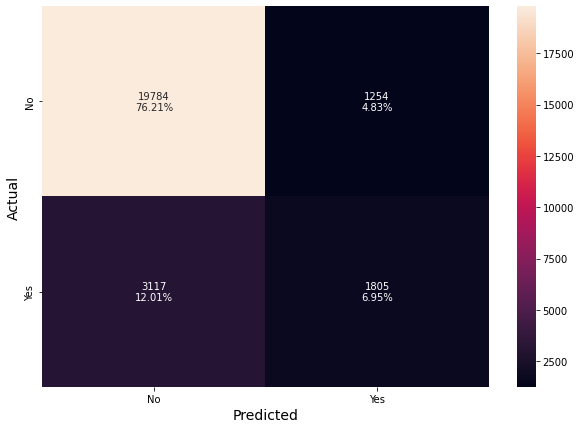

In [291]:
# Creating new pipeline with best parameters
xgb_tuned = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=42,
        n_estimators=248,
        scale_pos_weight=1.3,
        reg_lambda=1,
        max_depth=7,
        subsample=0.13,
        learning_rate=0.03,
        gamma=0,
        eval_metric='logloss',
        n_jobs=-1,
        scoring=scorer
    )
)

# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned, y_test)

In [286]:
pred = xgb_tuned.predict(df_test)
print(f"Prediction has length: {len(pred)}")

Prediction has length: 37500


In [287]:
prediction_dict = {
    'ID': test_id,
    'Loan/No Loan': pred
}
submit_df24 = pd.DataFrame(prediction_dict)
submit_df24.head()

,ID,Loan/No Loan
0,198980,1
1,167688,0
2,198768,1
3,192564,1
4,151199,0


In [288]:
submit_df24.to_csv('submit_df24.csv', index=False)